In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)


In [6]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
last_twelve = session.query(Measurement.date).filter(Measurement.date > '2017-08-23').order_by(Measurement.date).all()
last_twelve

# Calculate the date 1 year ago from the last data point in the database
last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
last_date = dt.datetime.strptime(last_date[0], '%Y-%m-%d').date()
one_year = last_date - dt.timedelta(days=365)


# Perform a query to retrieve the data and precipitation scores
date_precipitation = session.query(Measurement.date).order_by(Measurement.prcp.desc())

# Save the query results as a Pandas DataFrame and set the index to the date column
last_twelve_1 = session.query(Measurement.date,Measurement.prcp).filter(Measurement.date > '2016-08-23').order_by(Measurement.date).all()
last_twelve_1

# Sort the dataframe by date
df = pd.DataFrame(last_twelve_1,columns=['Date','Precipitation'])
df.head(10)

# Use Pandas Plotting with Matplotlib to plot the data
# I choose my birthday

,Date,Precipitation
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22
5,2016-08-24,2.15
6,2016-08-24,1.45
7,2016-08-25,0.08
8,2016-08-25,0.08
9,2016-08-25,0.00


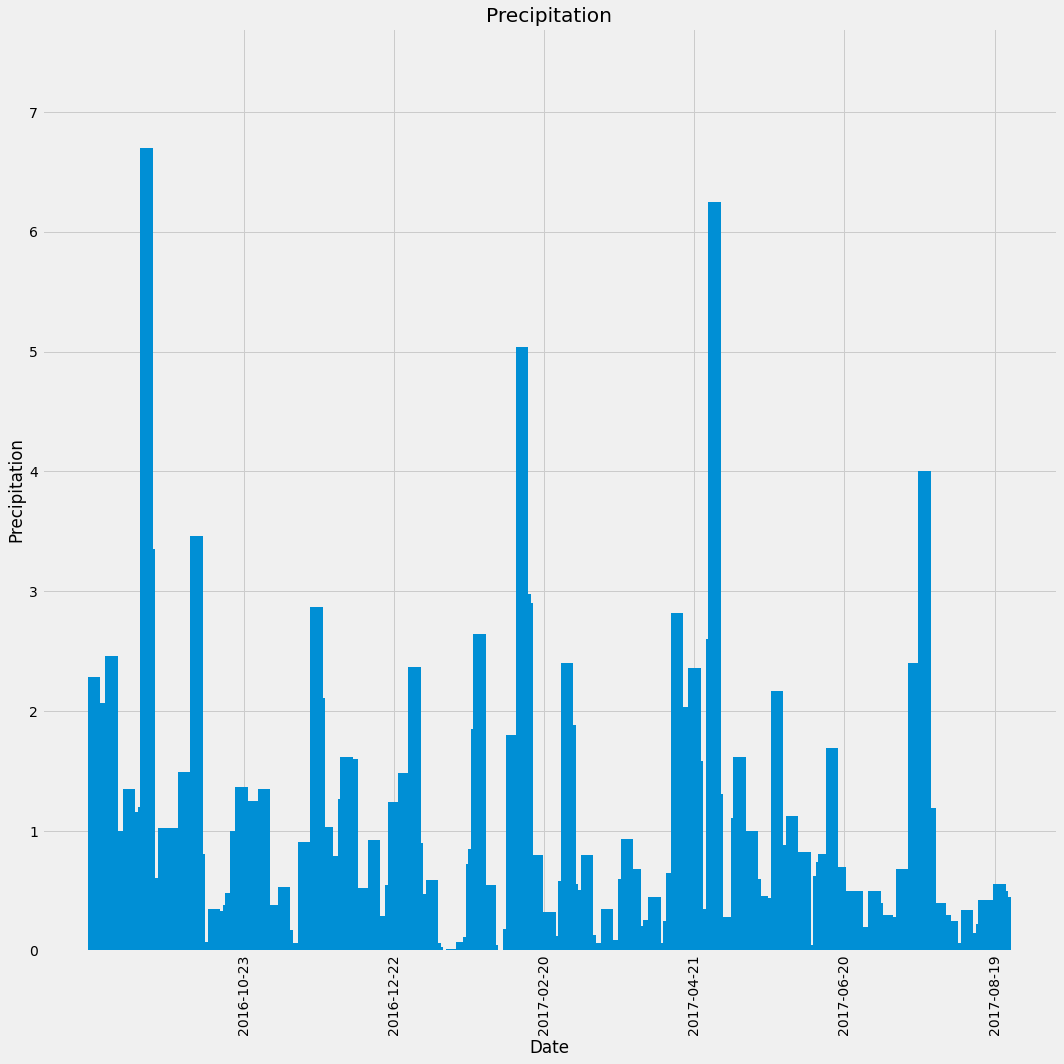

In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(15,15))
plt.bar(df["Date"], df["Precipitation"], align="center", width=5)
           
# Set x and y limits
plt.ylim(0, max(df["Precipitation"])+1)
plt.xticks(range(60,365,60), rotation=90)


# Set a Title and labels
plt.title("Precipitation")
plt.xlabel("Date")
plt.ylabel("Precipitation")
           
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/avg_rain.png")
plt.show()

In [12]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,Precipitation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [13]:
# Design a query to show how many stations are available in this dataset?
available_stations = session.query(Measurement.station).distinct(Measurement.station).count()
available_stations

9

In [14]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

active_station = session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
active_station

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [15]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
#Highest Temperation Recorded
highest_active_temp = session.query(func.max(Measurement.tobs)).filter(Measurement.station ==active_station[0][0]).all()
highest_active_temp
# 85.0

#Average Temperature Recorded
average_active_temp = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == active_station[0][0]).all()
average_active_temp
# 71.66378066378067

#Lowest Temperature Recorded
lowest_active_temp = session.query(func.min(Measurement.tobs)).filter(Measurement.station == active_station[0][0]).all()
lowest_active_temp
# 54.0

[(54.0)]

In [16]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Choose the station with the highest number of temperature observations.
most_temps_station = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()
most_temps_station= most_temps_station[0]

# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature_observations = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= one_year).filter(Measurement.station == most_temps_station).all()
temperature_observations = pd.DataFrame(temperature_observations, columns=['Date', 'Tempurature'])
temperature_observations.head()

,Date,Tempurature
0,2016-08-23,77.0
1,2016-08-24,77.0
2,2016-08-25,80.0
3,2016-08-26,80.0
4,2016-08-27,75.0


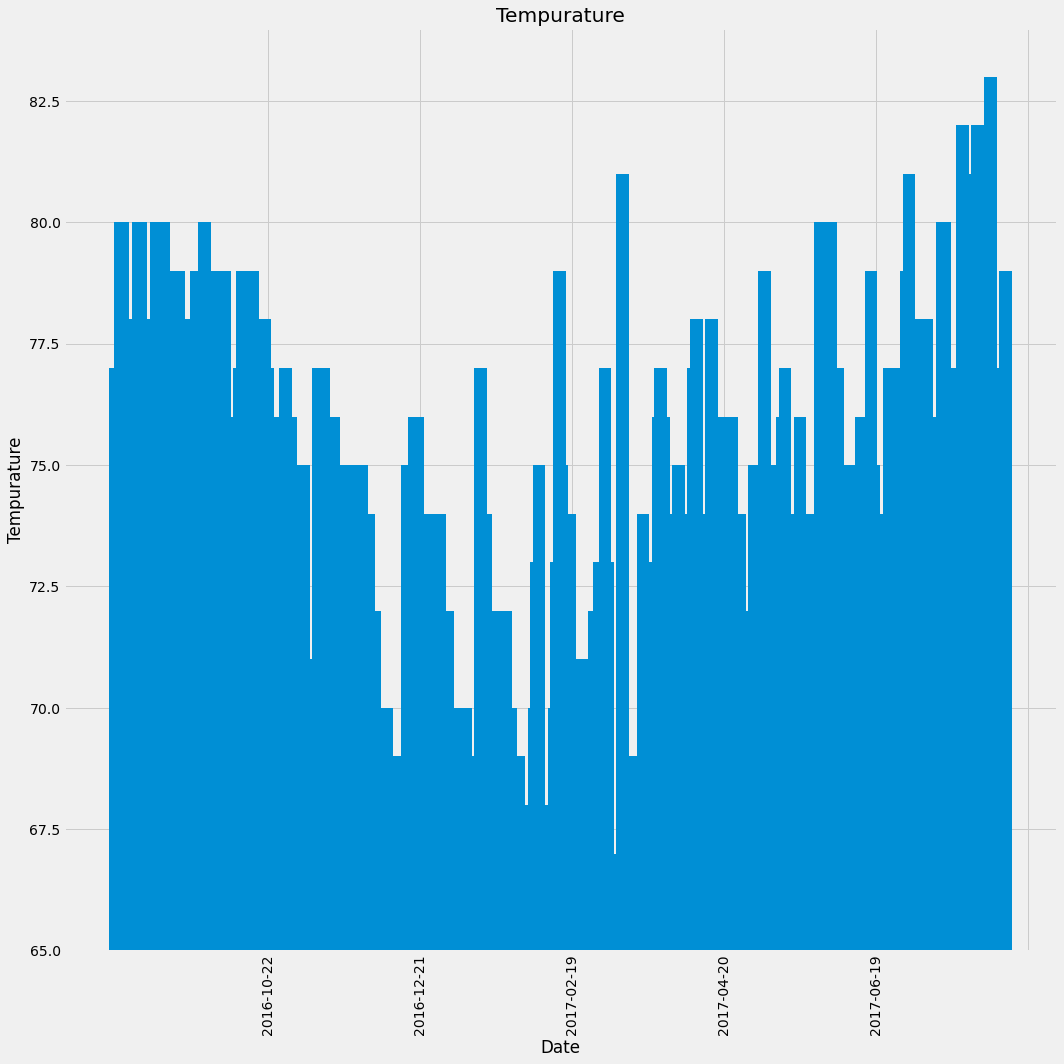

In [17]:
# Use Pandas Plotting with Matplotlib to plot the data

plt.figure(figsize=(15,15))
plt.bar(temperature_observations["Date"], temperature_observations["Tempurature"], align="center", width=5)
           
# Set x and y limits
plt.ylim(65, max(temperature_observations["Tempurature"])+1)
plt.xticks(range(60,365,60), rotation=90)


# Set a Title and labels
plt.title("Tempurature")
plt.xlabel("Date")
plt.ylabel("Tempurature")
           
# Save our graph and show the grap
plt.tight_layout()
plt.savefig("Images/avg_temp.png")
plt.show()

# Close session

In [18]:
# Close Session
session.close()